In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


# Data Overview

In [314]:
df = pd.read_csv('marketing_campaign_data.csv', index_col=0)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [315]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3000.00,12000.0,50000.00,259000.0


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64 

# Conversion rate analysis based on income, spending and age

In [317]:
df = df[df['NumWebVisitsMonth'] > 0]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [318]:
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x : x.split('-')[-1])

df['Age'] = np.int64(df['Dt_Customer']) - df['Year_Birth']
df['Age Category'] = df['Age'].apply(lambda x : 'Dewasa' if x < 40 else ('Paruh Baya' if x < 60 else ('Manula')))

In [319]:
dfg = df[df['Response'] == 0].groupby(['Age Category']).aggregate({'ID':'count'}).reset_index()
dfg2 = df[df['Response'] == 1].groupby(['Age Category']).aggregate({'ID':'count'}).reset_index()
dfg2['Conversion Rate'] = dfg2['ID'] / (dfg2['ID'] + dfg['ID']) * 100

dfg2['Age Category'] = pd.Categorical(dfg2['Age Category'], categories=['Dewasa', 'Paruh Baya', 'Manula'])
dfg2 = dfg2.sort_values('Age Category')
dfg2

,Age Category,ID,Conversion Rate
0,Dewasa,134,16.028708
2,Paruh Baya,157,14.030384
1,Manula,43,15.693431


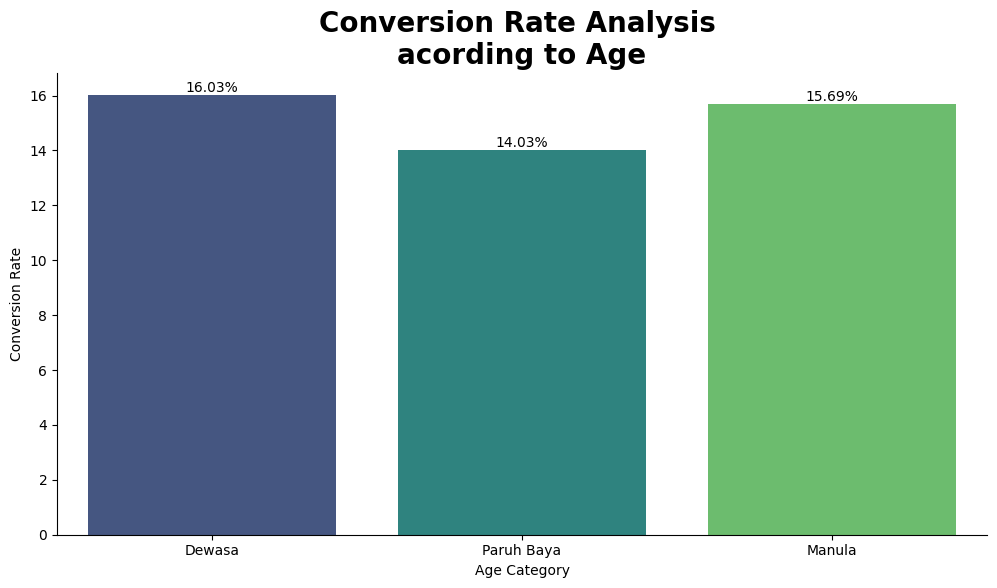

In [320]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = dfg2['Age Category'], y = 'Conversion Rate', data = dfg2, palette='viridis')

plt.title('Conversion Rate Analysis \nacording to Age', weight='bold', fontsize = 20)
sns.despine()

plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.show()

# Data Cleaning & Preprocessing

In [321]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 23
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Age Category            0
dtype: int64

In [322]:
df = df.dropna()

In [323]:
df = df.drop(columns='ID')
df.duplicated().sum()

183

In [324]:
df = df.drop_duplicates()

In [325]:
from sklearn.preprocessing import LabelEncoder
labelencod = LabelEncoder()

df['Marital_Status'] = labelencod.fit_transform(df['Marital_Status'])
df['Age Category'] = labelencod.fit_transform(df['Age Category'])
df['Education'] = labelencod.fit_transform(df['Education'])

In [326]:
from sklearn.preprocessing import StandardScaler
standscale = StandardScaler()

df['Income'] = standscale.fit_transform(df[['Income']])
df['MntCoke'] = standscale.fit_transform(df[['MntCoke']])
df['MntFruits'] = standscale.fit_transform(df[['MntFruits']])
df['MntMeatProducts'] = standscale.fit_transform(df[['MntMeatProducts']])
df['MntFishProducts'] = standscale.fit_transform(df[['MntFishProducts']])
df['MntSweetProducts'] = standscale.fit_transform(df[['MntSweetProducts']])
df['MntGoldProds'] = standscale.fit_transform(df[['MntGoldProds']])

<Axes: >

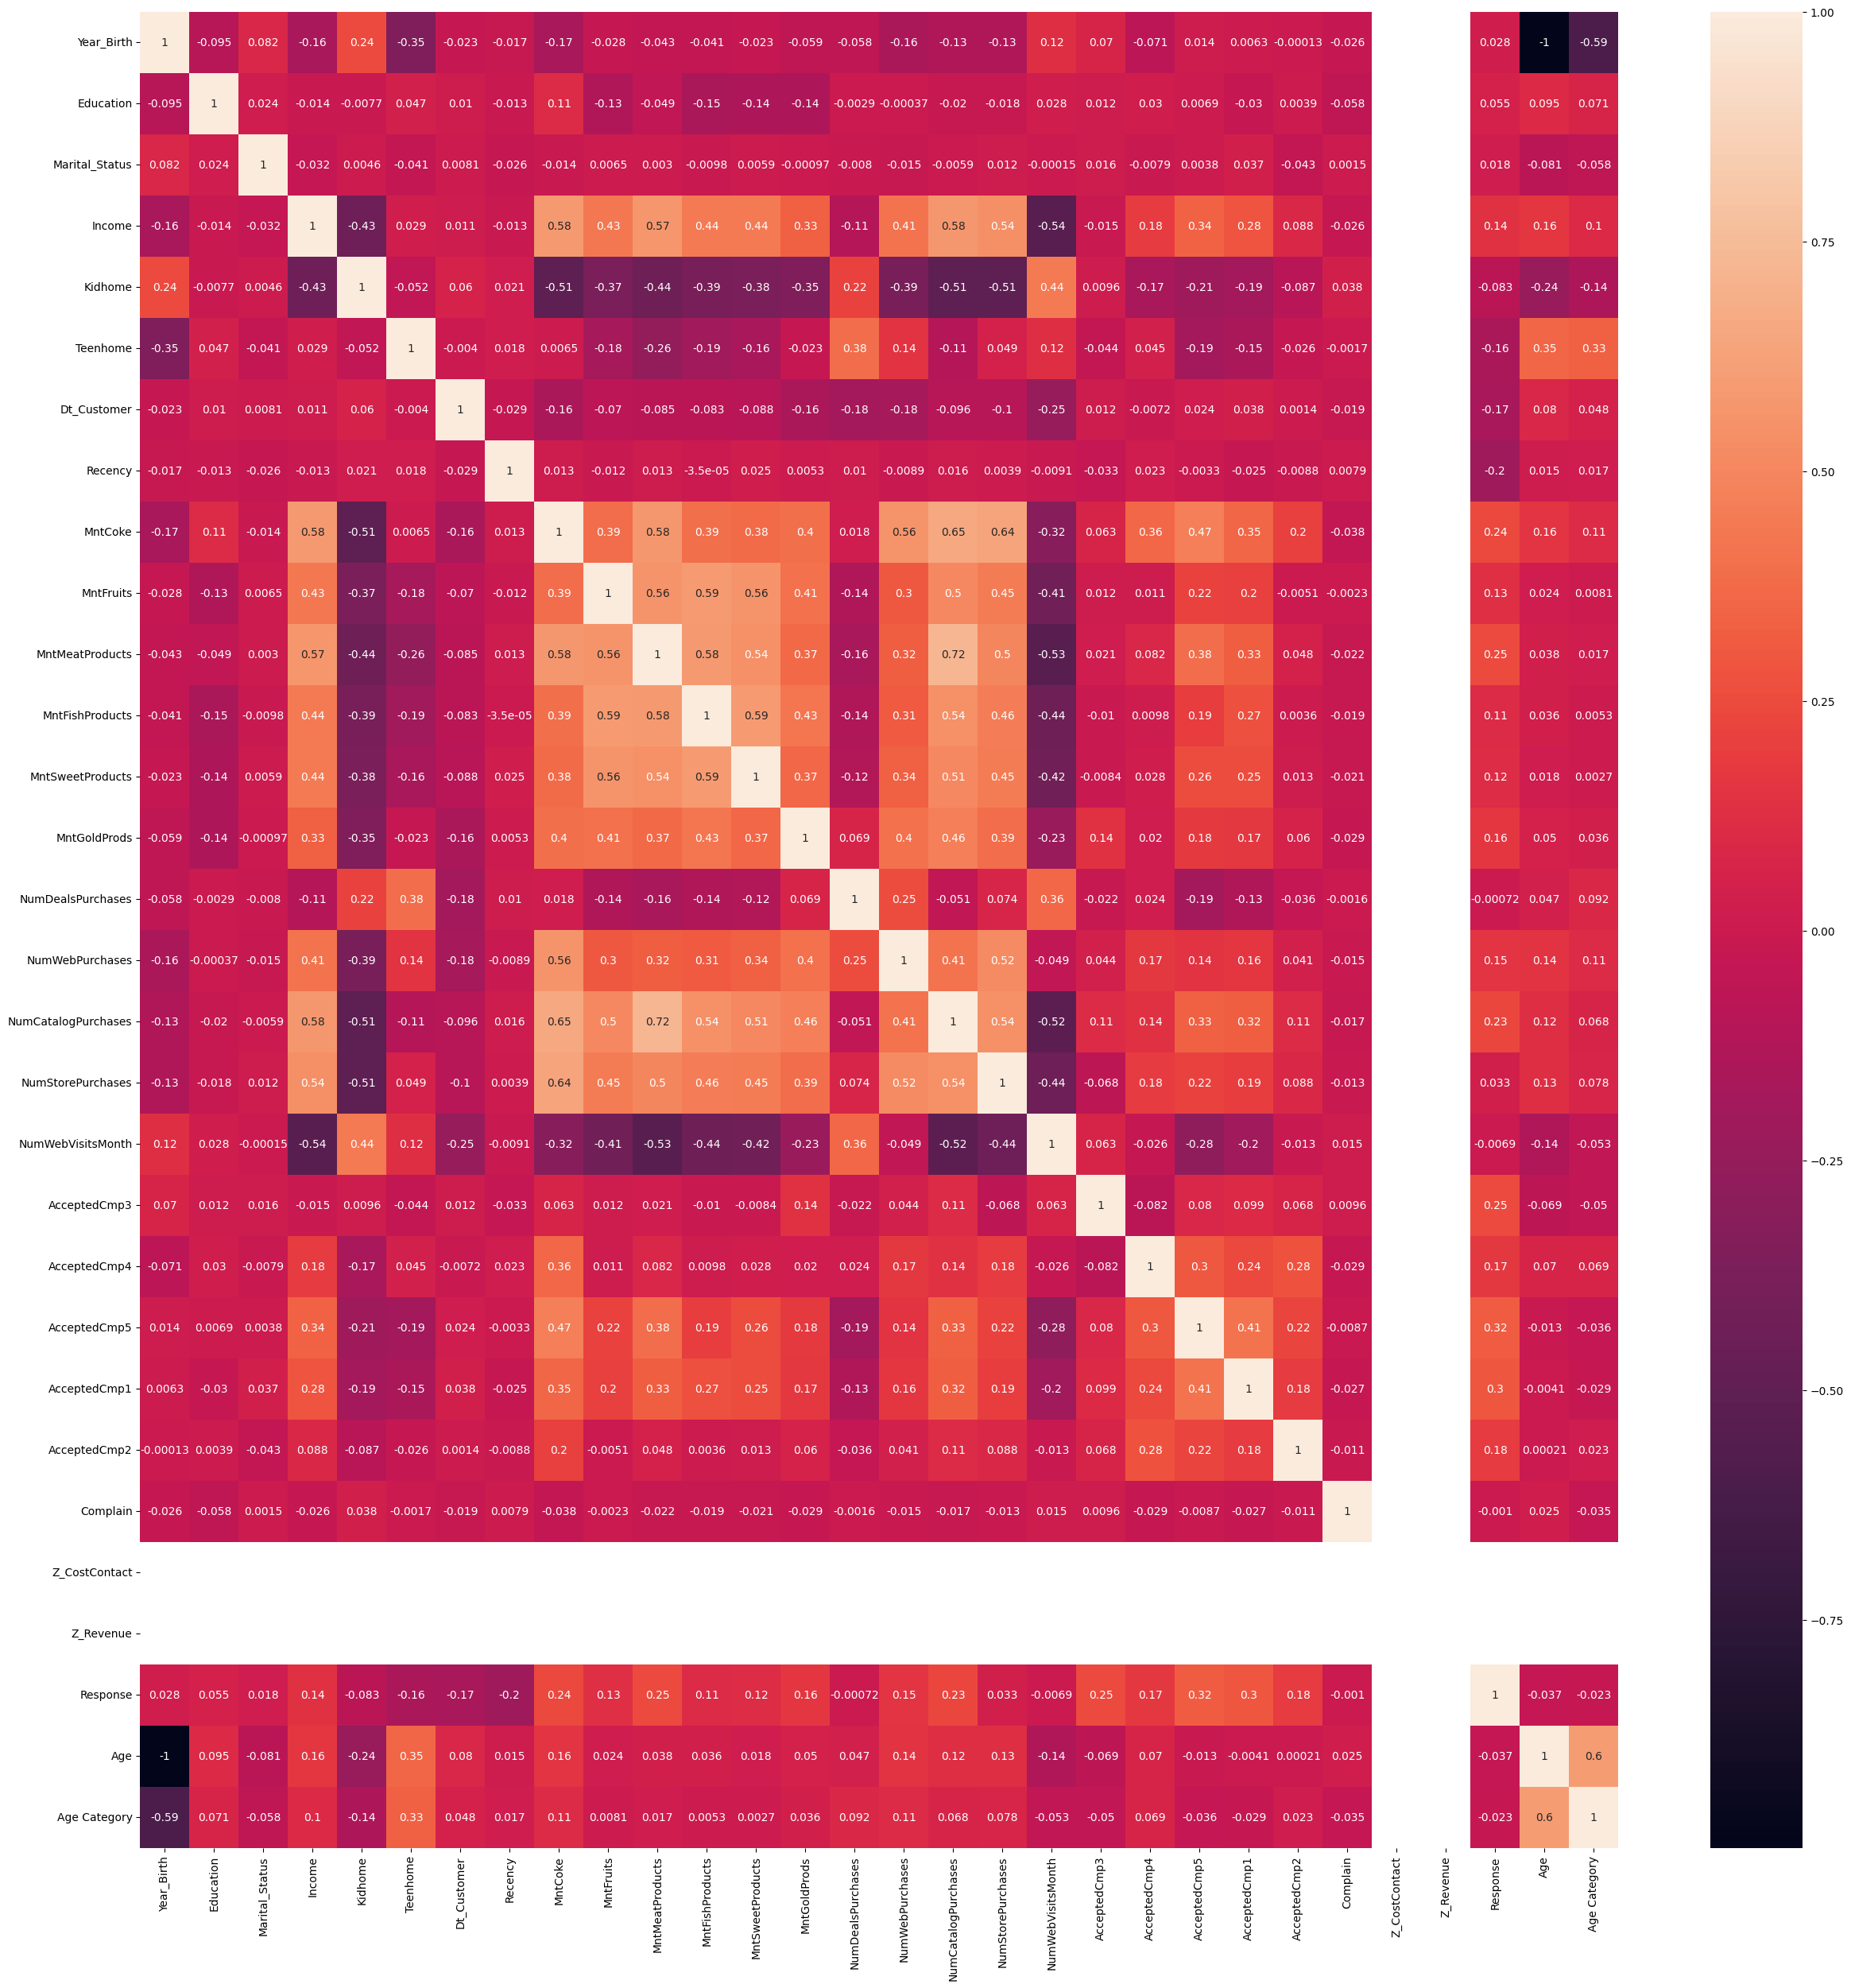

In [327]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True)

In [328]:
df['Child'] = df['Kidhome'] + df['Teenhome']
#df['Total'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
#df['Total_Purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df.drop(columns=['Z_Revenue','Z_CostContact','Age','Year_Birth','Recency','Kidhome','Teenhome','NumStorePurchases','NumCatalogPurchases','NumWebPurchases','NumWebVisitsMonth','NumDealsPurchases','AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2','Complain','Response','Dt_Customer','Education','Age Category','Child'],inplace=True)

In [329]:
df.head()

,Marital_Status,Income,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,4,0.240893,0.975634,1.556772,1.707946,2.470352,1.462907,0.862716
1,4,-0.229233,-0.871847,-0.636614,-0.719659,-0.646304,-0.630251,-0.734218
2,0,0.778026,0.356846,0.573530,-0.175696,1.352022,-0.149065,-0.033125
3,0,-1.014423,-0.871847,-0.560980,-0.656721,-0.499638,-0.582133,-0.753693
4,5,0.247071,-0.392212,0.422262,-0.216156,0.160359,-0.004710,-0.558945


# Modeling

In [330]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1,11) :
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

<Axes: >

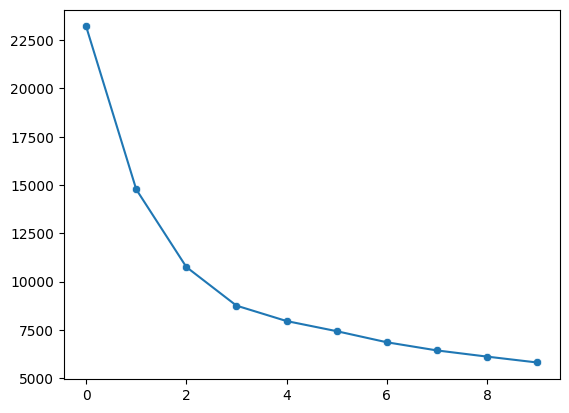

In [331]:
sns.lineplot(inertia)
sns.scatterplot(inertia)

In [332]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    36.331711
1    27.186963
2    18.579958
3     9.110540
4     6.580756
5     7.716113
6     6.149949
7     4.970588
8     4.969731
9          NaN
dtype: float64

In [333]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42).fit(df)
    preds = kmeans.predict(df)
     
    score_euclidean = silhouette_score(df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

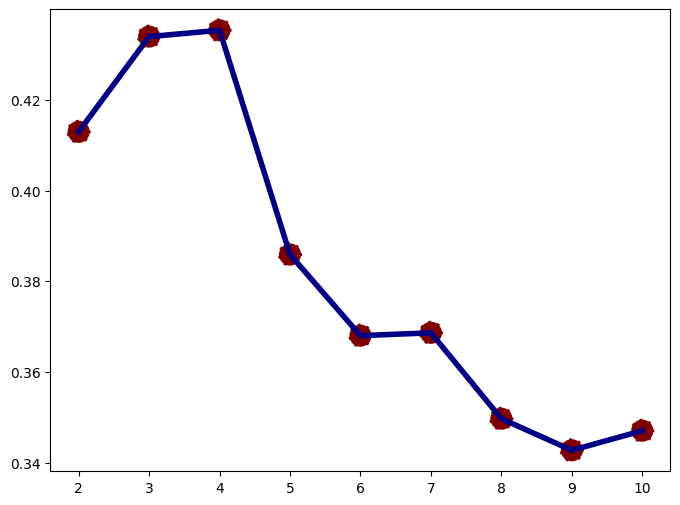

In [334]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

In [335]:
clast =arr_silhouette_score_euclidean.index(max(arr_silhouette_score_euclidean)) + 2

In [336]:
kmeans = KMeans(n_clusters=clast, random_state=42).fit(df)
clusters = kmeans.labels_
df['clusters'] = clusters

In [337]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=3)
pca.fit(df)
pcs = pca.transform(df)
final_pca = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2','PC3'])
final_pca['clusters'] = clusters
final_pca.head()

,PC1,PC2,PC3,clusters
0,2.747801,2.541137,-1.111302,2
1,-0.033818,-1.923043,0.054907,1
2,-1.596010,2.940733,-0.112985,3
3,-3.721653,-0.190703,-0.467811,0
4,1.567629,-1.189185,-0.254257,1


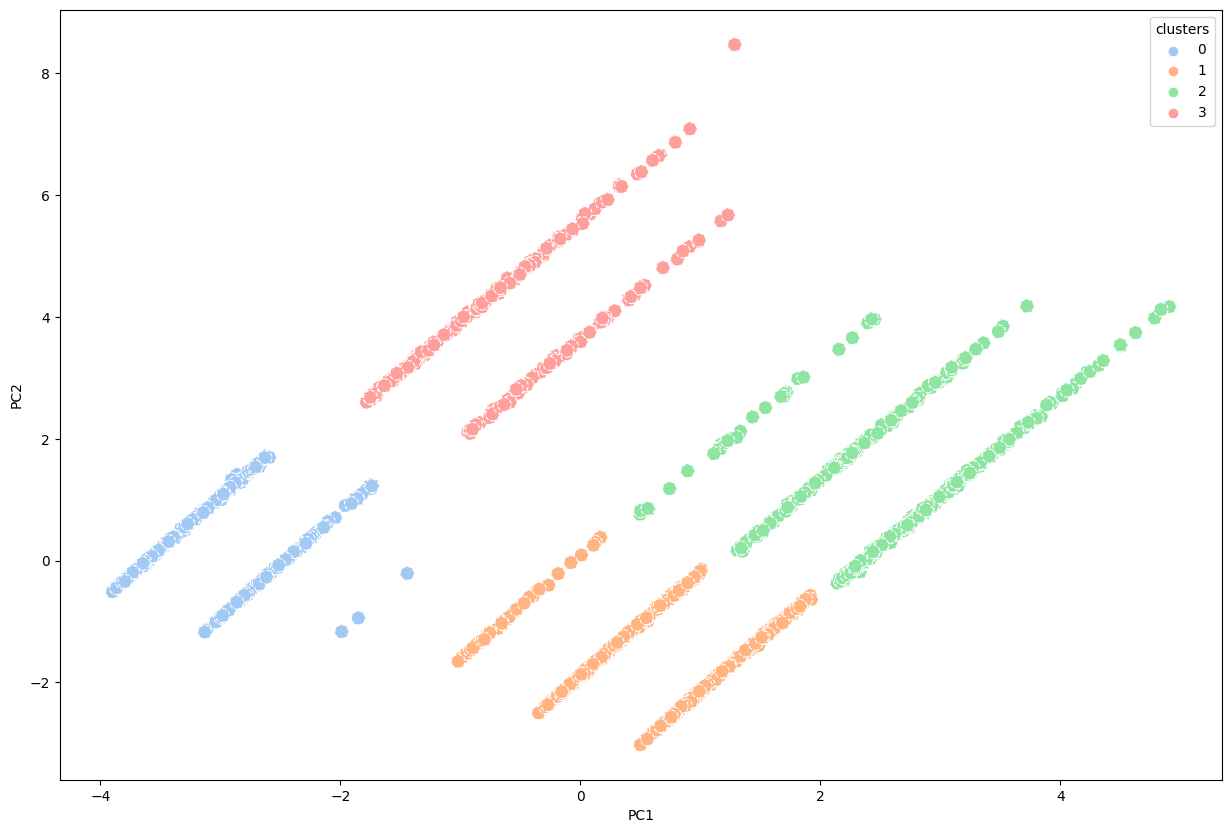

In [338]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2',hue='clusters',palette = 'pastel', linestyle= '--', s=100,data=final_pca,ax=ax)
plt.show()

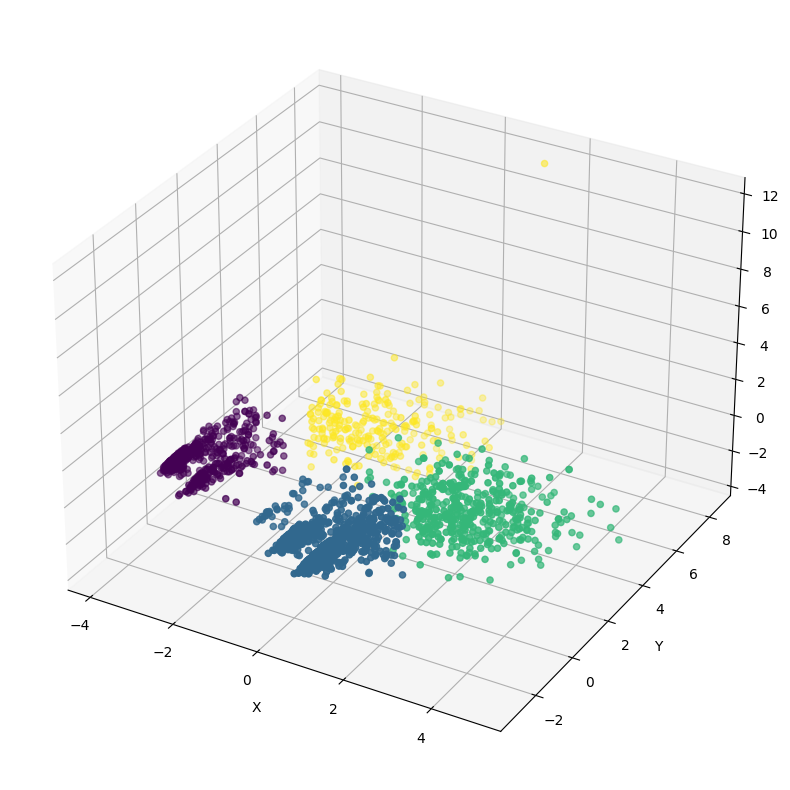

In [339]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, z, hue):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=hue)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

plot_3d(final_pca['PC1'], final_pca['PC2'], final_pca['PC3'], hue = final_pca['clusters'])

In [340]:
x = standscale.inverse_transform(df[['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']])
x = pd.DataFrame(x, columns = ['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'])
x['clusters'] = df['clusters']
x.groupby('clusters').agg(['mean','min','max']).T

clusters                         0.0            1.0            2.0   
MntCoke          mean   45929.960422   44577.763202   41206.817979  \
                 min    -2739.281753   -2739.281753   -2739.281753   
                 max   224085.701851  223173.537037  224237.729320   
MntFruits        mean   42328.018432   43365.938884   43489.008268   
                 min     9717.249340    9717.249340    9717.249340   
                 max   246622.078156  264745.944842  267335.068654   
MntMeatProducts  mean   45373.443917   42829.982419   40550.524846   
                 min     5362.553910    5593.393931    5593.393931   
                 max   224891.413382  403561.589229  403561.589229   
MntFishProducts  mean   46046.213919   43517.989634   40851.493829   
                 min     8631.478097    8631.478097    8631.478097   
                 max   247743.005393  243977.469530  231739.477975   
MntSweetProducts mean   45087.851540   44686.627027   42449.189129   
                 min    10103.144249   10103.144249   10103.144249   
                 max   249771.933925  251007.340057  333779.550924   
MntGoldProds     mean   39964.125561   45112.388250   44706.940874   
                 min        0.000000       0.000000       0.000000   
                 max   247000.000000  242000.000000  262000.000000   

clusters                         3.0  
MntCoke          mean   37661.180953  
                 min    -2739.281753  
                 max   209187.009898  
MntFruits        mean   43735.142599  
                 min     9717.249340  
                 max   232381.897189  
MntMeatProducts  mean   43368.787061  
                 min     5593.393931  
                 max   231816.613996  
MntFishProducts  mean   43790.303038  
                 min     8631.478097  
                 max   252449.925221  
MntSweetProducts mean   39078.044023  
                 min    10103.144249  
                 max   252242.746189  
MntGoldProds     mean   43198.237885  
                 min        0.000000  
                 max   321000.000000